# TensorFlow Basics
## Preprocessing Data

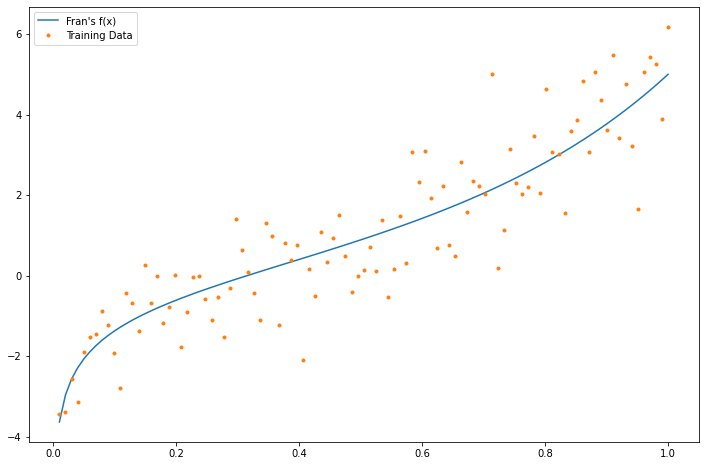

In [148]:
import matplotlib
import tensorflow as tf
from matplotlib import pyplot as plt

# the number of samples to use
N_SAMPLES = 101

# sets size of graphs
matplotlib.rcParams['figure.figsize'] = [12, 8]

# generates 201 numbers from [-2, 2]
train_x = tf.linspace(0.01, 1, N_SAMPLES)

# cast x to float32
train_x = tf.cast(train_x, tf.float32)

# define an f(x) to act as truth
def f(x):
    true_y = tf.math.log(x) + (5 * x) ** x
    return true_y

# generate some targets based on f(x) + some randomness
train_y = f(train_x) + tf.random.normal(shape=[N_SAMPLES])

# graph y f(x)
plt.plot(train_x, f(train_x), label='Fran\'s f(x)')
plt.plot(train_x, train_y, '.', label='Training Data')
plt.legend()

## Defining the Model

In [149]:
# define a new Model
class Model(tf.keras.Model):
    # initializer
    def __init__(self, units):
        # call super constructor
        super().__init__()

        # define layers
        # 1. dense layer
        self.dense1 = tf.keras.layers.Dense(
            units=units,
            activation=tf.nn.relu,
            kernel_initializer=tf.random.normal,
            bias_initializer=tf.random.normal
        )
        # 2. dense layer (hidden)
        self.dense2 = tf.keras.layers.Dense(units)

        # 3. dense layer (single output)
        self.dense3 = tf.keras.layers.Dense(1)

    # call is called to make a prediction
    def call(self, x, training=True):
        # safe copy x
        x = x[:, tf.newaxis]

        # send through all layers
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)

        # return processed x
        return tf.squeeze(x, axis=1)

## Initializing the Model

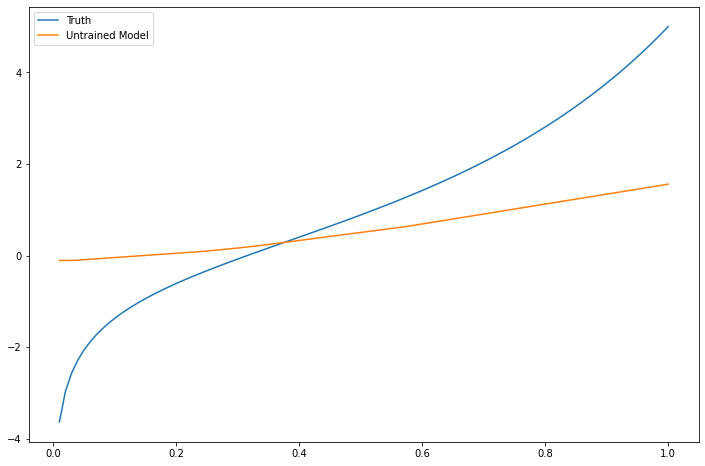

In [150]:
# initialize and compile model
model = Model(64)
model.compile(
    # Loss Function: Mean Squared Error
    loss=tf.keras.losses.MSE, 

    # Optimizer: Stochastic Gradient Descent
    # > learning rate = 0.01
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.01
    )
)

# show untrained model
plt.plot(train_x, f(train_x), label='Truth')
plt.plot(train_x, model(train_x), label='Untrained Model')
plt.legend()

## Training the Model

INFO:tensorflow:Assets written to: ./model\assets


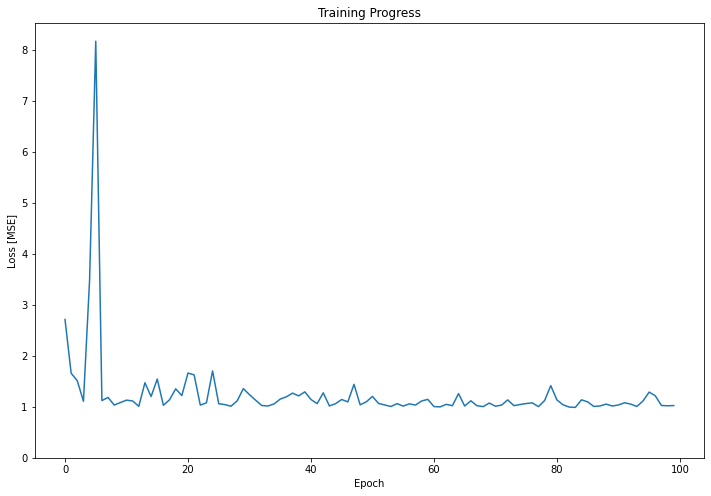

In [151]:
# train the model and record its training history
train_history = model.fit(train_x, train_y,
    epochs = 100,
    batch_size = 32,
    verbose = 0
)

# plot model train history
plt.plot(train_history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [MSE]')
plt.title('Training Progress')

# save the model to ./model
model.save('./model')

## Using the Model

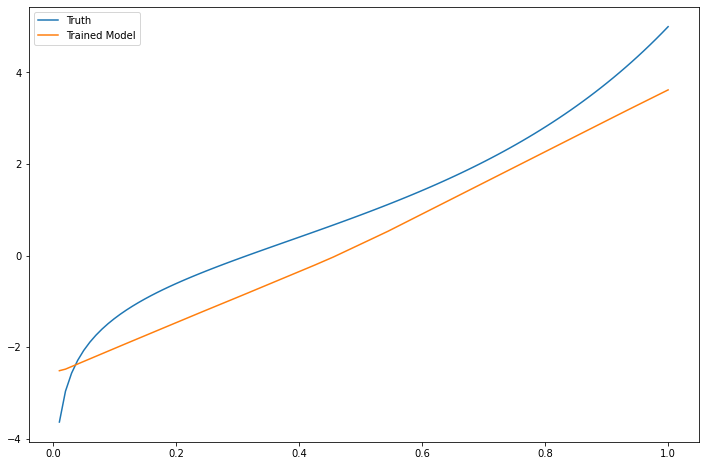

In [152]:
# call the model to create predictions
pred_y = model(train_x)

# plot predictions of trained model
plt.plot(train_x, f(train_x), label='Truth')
plt.plot(train_x, pred_y, label='Trained Model')
plt.legend()